# Банки - Анализ оттока клиентов

Задачи:
* Провести исследовательский анализ данных, определить все значимые признаки отточности.
* Сформулировать и проверить статистические гипотезы.
* Объединяя признаки отточности, сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации.
* По итогам исследования подготовить презентацию.

Описание датасета: Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:
* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности,
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

Ссылка на презентацию: https://disk.yandex.ru/i/7ajJGUB3tAMgdA

## Загрузка и описание данных

Подключим библеотеки, загрузим данные из CSV-файла, выведем первые пять строк таблицы и изучим информацию о ней.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

C:\Users\super\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    dt = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    dt = pd.read_csv('logs_exp.csv')

In [3]:
dt.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Посмотрим описание столбцов с числовыми данными, построим для них графики распределения.

In [5]:
dt.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Графики распределения для различных признаков клиентов Метанпромбанка: 


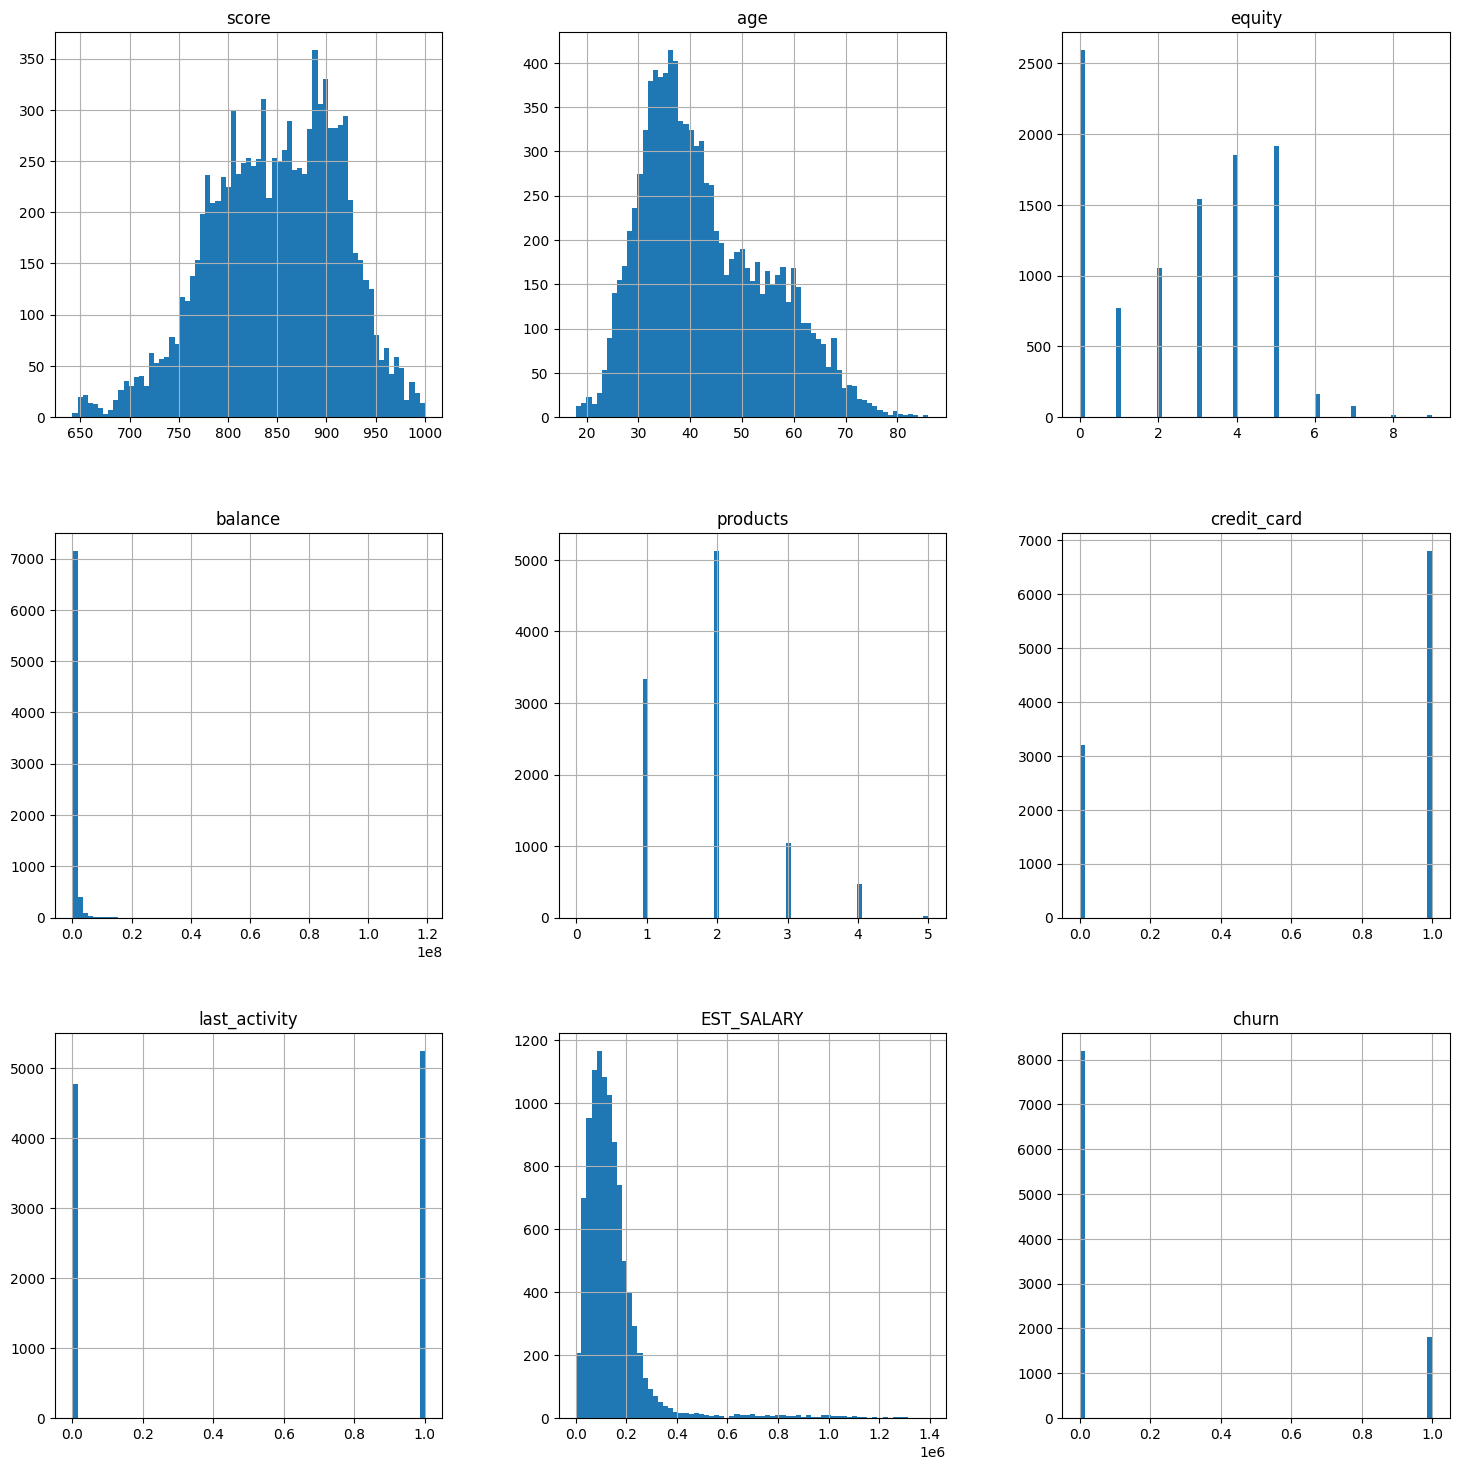

In [6]:
dt.drop('USERID', axis=1).hist(bins = 69, figsize=(18, 18))
print('Графики распределения для различных признаков клиентов Метанпромбанка: ')

Посмотрим, как клиенты распределены по городам и по полу.

In [7]:
dt.groupby('city')['USERID'].count()

city
Ростов       1417
Рыбинск      2695
Ярославль    5888
Name: USERID, dtype: int64

In [8]:
dt.groupby('gender')['USERID'].count()

gender
Ж    4995
М    5005
Name: USERID, dtype: int64

**Вывод:** *Есть 11 столбцов с параметрами клиентов плюс столбец с их id. В выборке данные о 10000 клиентов. Есть немного пропусков в столбце с возрастом и значительное количество пропусков в стобце с балансом. Есть некорректные названия столбцов и типы данных.*

Наблюдения по столбцам:
* *Минимальное значение баллов кредитного скоринга - 642, максимальное - 1000. Большая часть значений находится между 790 и 930 баллами, особенно много клиентов имеют в районе 890 баллов.*
* *Много клиентов в возрасте от 30 до 40 лет, после 40 количество клиентов постепенно снижается. Минимальный возраст клиента - 18 лет, максимальный - 86, средний - 43 года.*
* *Более 25% клиентов имеют 0 баллов собственности. Распределение выглядит необычно. Максимально возможное количество баллов - 9, но таких клиентов мало.*
* *Средний баланс клиентов - 827000 рублей, медианный - 524000 рублей. В выборке есть клиенты с нулевым балансом, а есть клиент с 119000000 рублей.*
* *Максимальное количество продуктов, судя по имеющимся данным - 5, есть клиенты, у которых указано 0 продуктов, что странно. Чаще всего клиенты имеют 2 продукта.*
* *Около 68% клиентов имеют кредитную карту.*
* *Чуть меньше половины клиентов - около 48% - не заходили в личный кабинет в течение последних 30 дней, то есть они не активны.*
* *Большинство клиентов Метанпромбанка в выборке имеют доход до 200000 рублей, средний доход 148000 рублей, медианный - 120000 рублей, нет клиентов у которых был бы указан нулевой доход. Минимальный доход - 2500 рублей, максимальный - 1395000 рублей.*
* *В выборке чуть больше 18% процентов клиентов, которых можно считать ушедшими, так как они не заходили в личных кабинет более полугода.*
* *Больше половины клиентов в выборке - из Ярославля.*
* *В выборке почти одинакое количество женщин и мужчин.*

## Подготовка данных

### Обработка данных

Попробуем определить, от чего зависят пропуски в столбце 'balance'. Добавим новый столбец 'is_balance_nan' типа bool, который хранит информацию о том, есть ли в этой строке пропуск в столбце 'balance' или нет. Создадим таблицу чтобы определить, как отличаются различные признаки между пользователями у которых есть данные о балансе, и пользователями у которых их нет.

In [9]:
dt['is_balance_nan']=dt['balance'].isna()

balance_na_cause = (
    dt.groupby('is_balance_nan').agg({'score':'mean', 'city':lambda x: pd.Series.mode(x), 
                                      'gender':lambda x: pd.Series.mode(x), 'age':'mean', 
                                      'equity':'mean', 'EST_SALARY':['mean', 'median'], 
                                      'products':'mean', 'credit_card':'mean', 
                                      'last_activity':'mean', 'churn':'mean', }).round(2).T.reset_index(drop=True)
)
balance_na_cause.rename(
    index={0: 'mean_score', 1: 'city_mode', 2: 'gender_mode', 4: 'mean_equity', 5: 'mean_salary', 
           6: 'median_salary', 7: 'mean_products', 8: 'having_credit_card_part', 9: 'last_activity_part', 
           3: 'mean_age', 10: 'churn',}, inplace=True
)

balance_na_cause['true_false_difference'] = round(
    balance_na_cause.drop(['gender_mode', 'city_mode'],axis = 0)[True].astype(float)
              / balance_na_cause.drop(['gender_mode', 'city_mode'],axis = 0)[False].astype(float), 2)
balance_na_cause

is_balance_nan,False,True,true_false_difference
mean_score,843.74,865.35,1.03
city_mode,Ярославль,Ярославль,NaN
gender_mode,Ж,М,NaN
mean_age,42.92,42.09,0.98
mean_equity,3.4,0.05,0.01
mean_salary,124501.87,226310.21,1.82
median_salary,106222.2,174160.68,1.64
mean_products,2.08,1.16,0.56
having_credit_card_part,0.64,0.82,1.28
last_activity_part,0.52,0.55,1.06


*У пользователей без данных о балансе значительно ниже средний показатель баллов собственности. Средняя зарплата у пользователей без данных о балансе выше на 82%, медианная - на 64%. У них намного ниже среднее число продуктов - 1.16, они чаще имеют кредитную карту и у них намного ниже отскок, чем у остальных пользователей.*

*Если данные о балансе собирались с дебетовых карт, возможно, пользователи, у которых нет данных о балансе, просто не имеют дебетовую карту, у них в Метанпромбанке, например, кредитная карта. Это подтвердается малым количеством продуктов, высоким процентом наличия кредитных карт, зп выше потому что все время есть долг по кредитке и приходится вертеться, отскок низкий потому что возможность расплатиться в долг вызывает привыкание. Баллы собственности намного ниже, потому что при оформлении кредитной карты не нужно указывать данные об имуществе, в отличие от дебетовой карты, и балл автоматически выставляется как 0.*

*Верна эта версия или нет, удаление всех строк с пропусками или замена их на какое-то значение исказит данные, поэтому лучше оставить их без изменений.*

Из 10000 строк всего в 26 есть пропуск в столбце 'age'. Удаление такого количества строк почти не повлияет на исследование, затраты времени на выяснение их причин вряд ли окупятся. Удалим эти строки.

In [10]:
data = dt.dropna(subset=['age'])

Измененим типы данных и названия некоторых столбцов.

In [11]:
data.rename(columns={'USERID': 'id', 'last_activity': 'is_active','EST_SALARY': 'estimated_salary'}, inplace=True)
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

Найдем неявные дубликаты.

In [12]:
display(data[data['id'].duplicated(keep=False)].sort_values(by='id').head(20))
data[data['id'].duplicated(keep=False)].groupby('churn')['id'].agg('count')

,id,score,city,gender,age,equity,balance,products,credit_card,is_active,estimated_salary,churn,is_balance_nan
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,False
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,True
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,False
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,True
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,False
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,True
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,False
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,True
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,False
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,False


churn
0    50
1    50
Name: id, dtype: int64

*Id-дубли всегда идут парами, нет трех одинаковых id. Необъяснимо, но факт - у каждой такой пары всегда разный признак оттока и разный город(Ярославль либо Рыбинск). Неужели филиалы Рыбинска и Ярославля договорились присваивать клиентам одинаковые id, при том так, чтобы парные id всегда доставались ушедшему и не ушедшему клиенту? В любом случае, судя по остальным данным, одинаковый id имеют разные люди, поэтому нет смысла удалять эти строки, придется оставить эту загадку неразгаданной.*

Столбцы с балансом и зарплатой имеют значения сильно выше средних, но это не выглядит как аномалии. Точно можно сказать, что у банка не может быть клиента с 0 продуктов, удалим строку с аномальным значением.

In [13]:
data = data.query('products!=0')

### Кодирование категориальных переменных

Закодируем неупорядоченные категориальные переменные чтобы с ними можно было проводить корреляционный анализ и сохраним результат в новой таблице.

In [14]:
dt_coded = pd.get_dummies(data)
dt_coded.head()

,id,score,age,equity,balance,products,credit_card,is_active,estimated_salary,churn,is_balance_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,False,0,1,0,1,0
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,False,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,107683.34,0,True,0,1,0,1,0
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,False,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,67353.16,1,False,0,0,1,0,1


*В таблицу добавились пять новых столбцов со значениями от 0 до 1 вместо двух старых.*

## Исследовательский анализ данных

### Анализ распределения признаков

Создадим гистограммы распределения для непрерывных признаков клиентов, чтобы найти интервалы признака, на которых отток выше, чем лояльность.

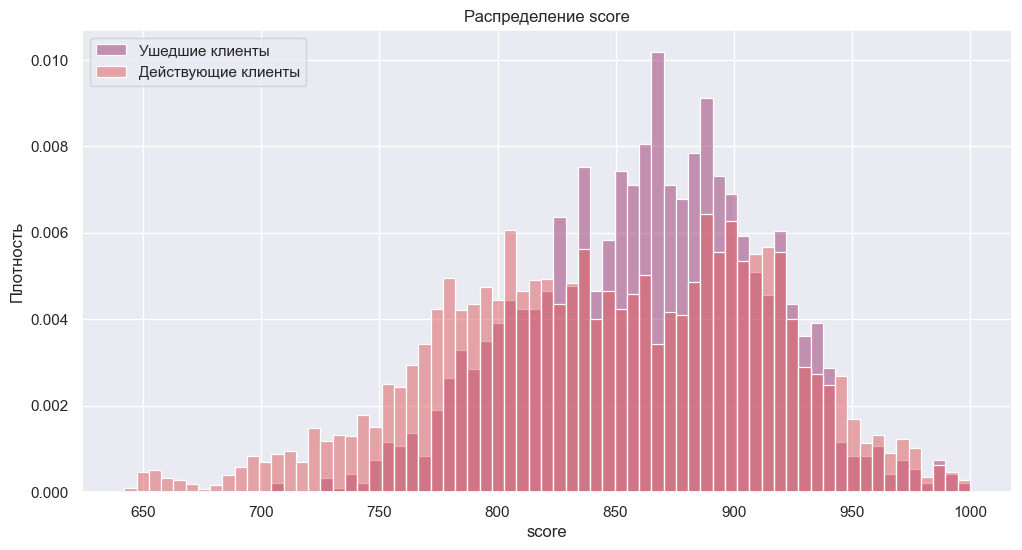

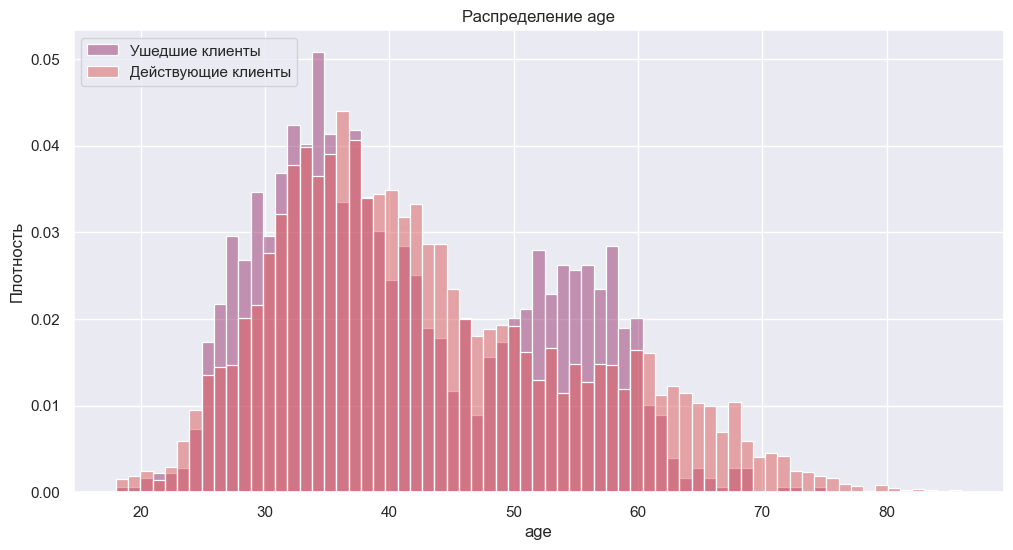

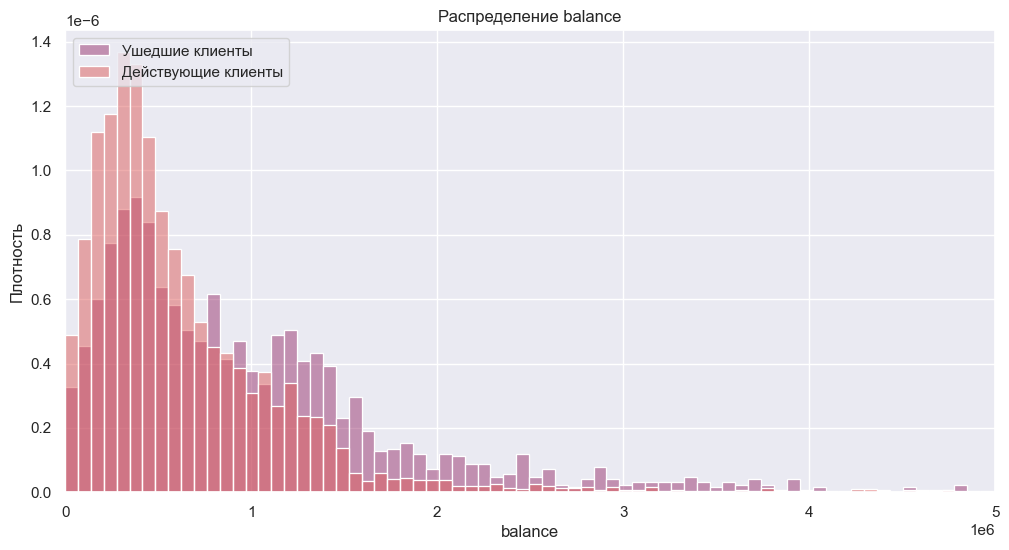

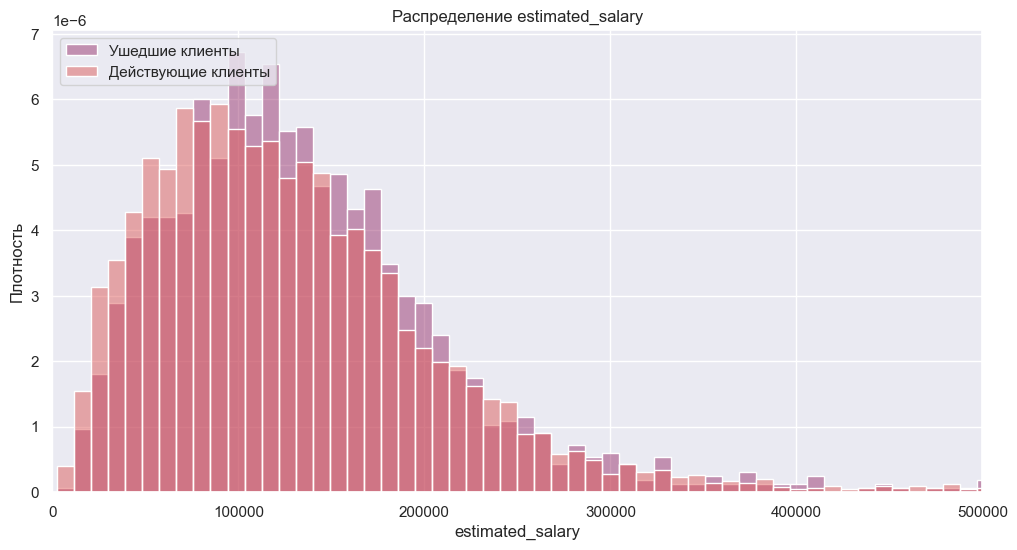

In [15]:
sns.set_theme(rc={'figure.figsize':(12,6)})
continuous_variables=['score', 'age', 'balance', 'estimated_salary']

for variable in continuous_variables:
    if variable=='balance':
        plt.xlim(0, 5000000)
        sns.histplot(x=variable, data=data, hue='churn', palette="flare", stat="density", common_norm=False)
    elif variable=='estimated_salary':
        plt.xlim(0, 500000)
        sns.histplot(x=variable, data=data, hue='churn', palette="flare", stat="density", common_norm=False)
    else:
        sns.histplot(x=variable, data=data, hue='churn', palette="flare", stat="density", common_norm=False, bins=69)
    plt.title(f'Распределение {variable}')
    plt.xlabel(variable)
    plt.ylabel('Плотность')
    plt.legend(loc='upper left', labels=['Ушедшие клиенты', 'Действующие клиенты'])
    plt.show()

In [16]:
rich_by_churn = data.query('balance>1500000').groupby('churn')['balance'].count()
print(f'Доля ушедших среди клиентов, у которых на балансе более 1500000 рублей: {round(100 * rich_by_churn[1] / (rich_by_churn[0] + rich_by_churn[1]),2)}%')

Доля ушедших среди клиентов, у которых на балансе более 1500000 рублей: 50.07%


*Среди ушедших клиентов значние баллов кредитного скоринга чаще оказывается в диапазоне от 830 до 940, чем у действующих клиентов.*

*Среди ушедших больше доля клиентов в возрасте от 26 до 36 и от 50 до 60, чем среди оставшихся.*

*Среди ушедших больше доля клиентов с балансом на счете от 1000000 рублей, чем среди оставшихся. 50% клиентов в выборке с балансом выше 1500000 рублей - ушедшие.*

*Среди ушедших больше доля клиентов с оценочным доходом от 100000 рублей до 200000 рублей, чем среди оставшихся.*

Построим столбчатую диаграмму для категориальных признаков, чтобы найти значения признака с оттоком выше, чем в среднем по банку.

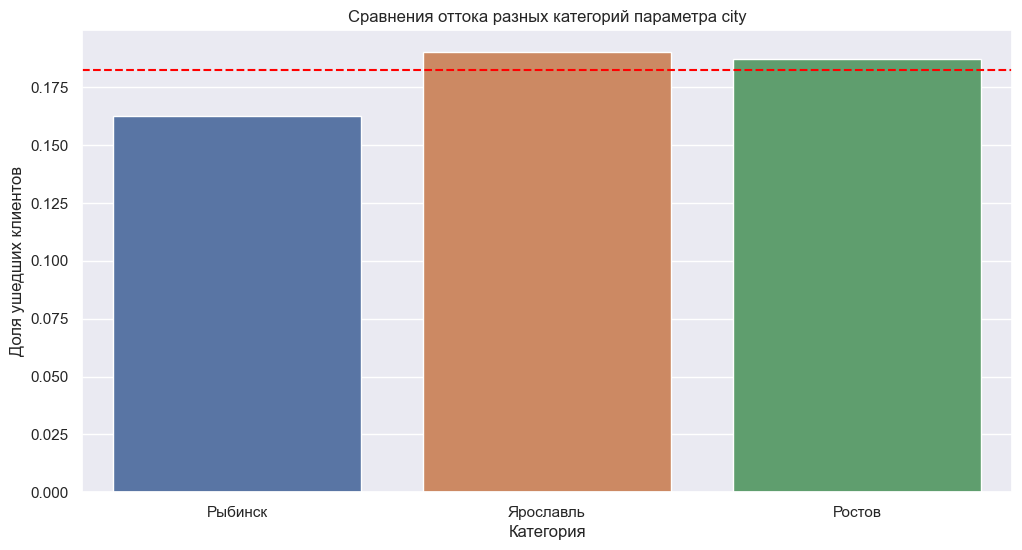

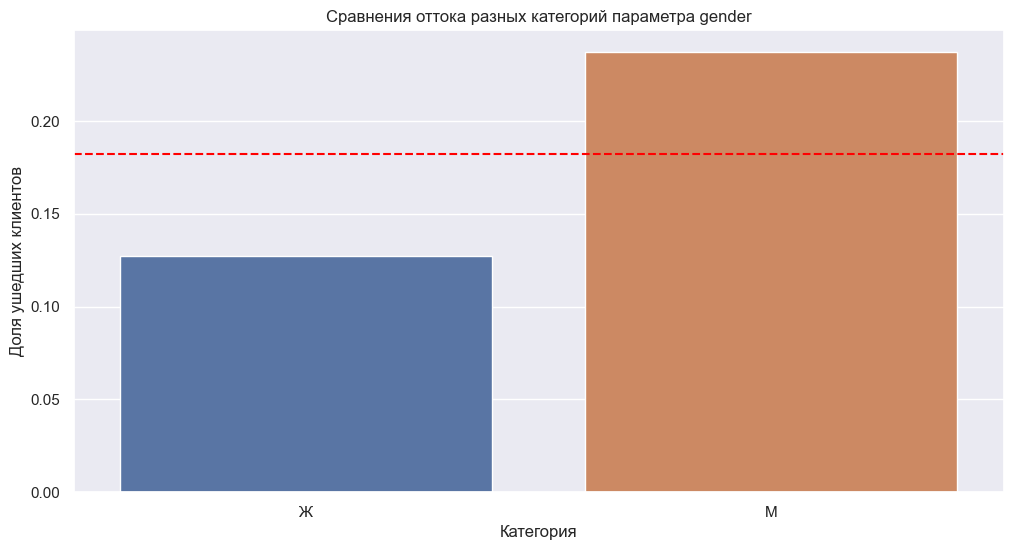

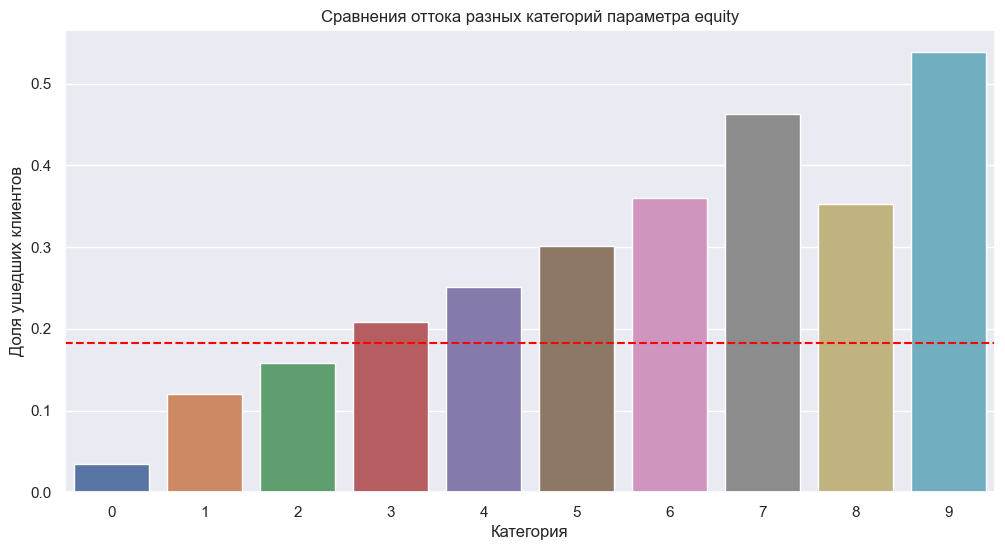

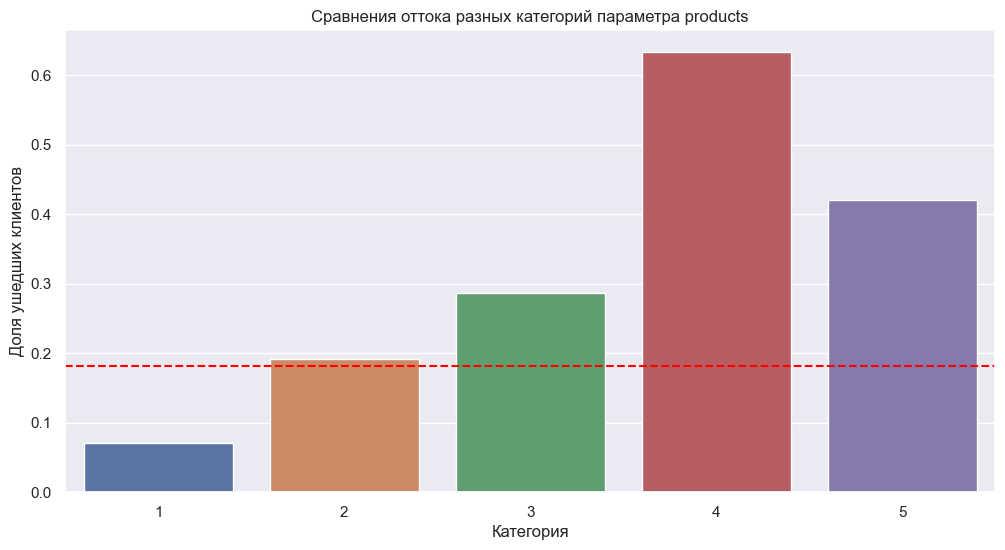

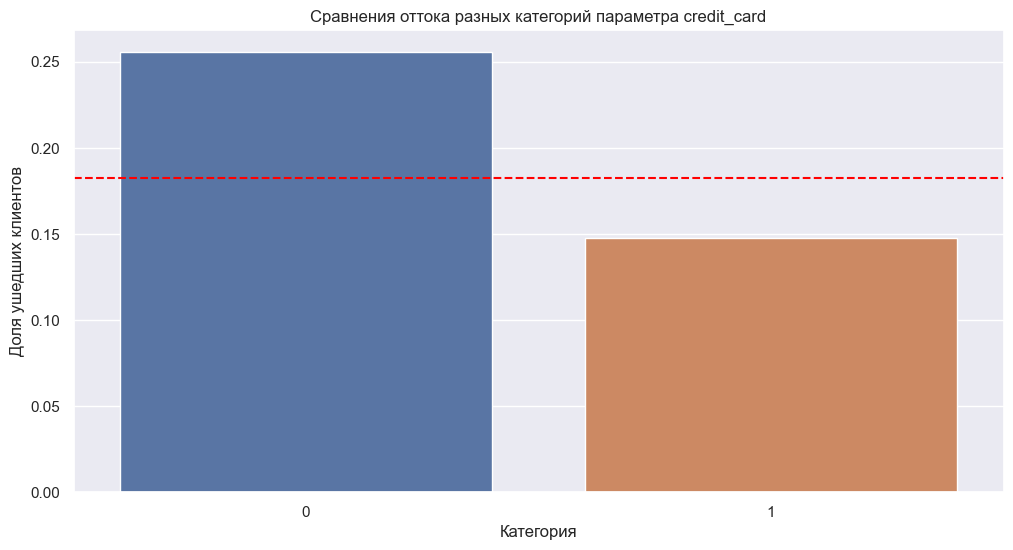

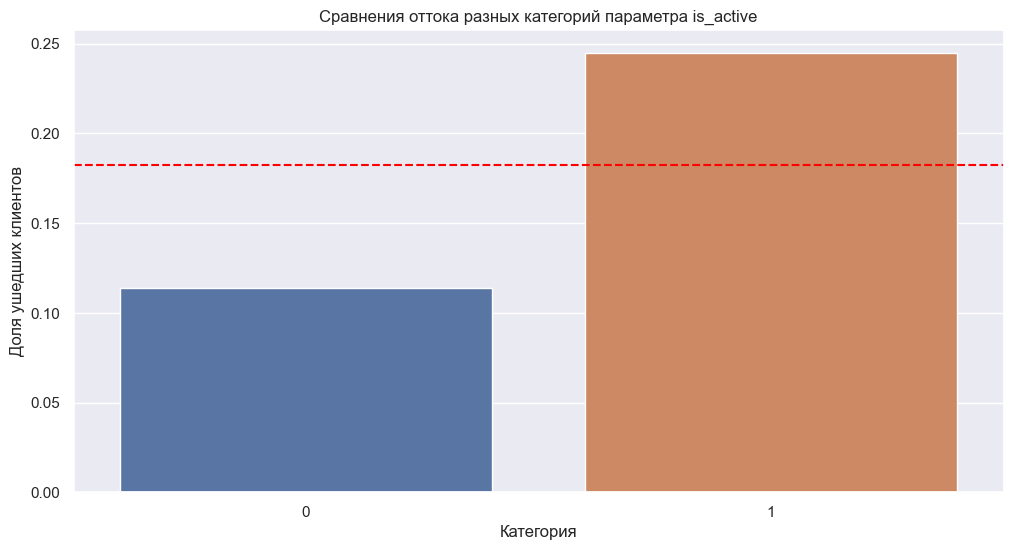

In [17]:
discrete_variables = ['city', 'gender','equity', 'products', 'credit_card', 'is_active']

for variable in discrete_variables:
    sns.barplot(x = variable, y = 'churn', data = data, ci=0)
    plt.title(f'Сравнения оттока разных категорий параметра {variable}')
    plt.xlabel('Категория')
    plt.ylabel('Доля ушедших клиентов')
    plt.axhline(data['churn'].mean(), color="red", linestyle="--") #аыыыыыыыы
    plt.show()

In [18]:
print(f'Число клиентов, у которых 8-9 баллов собственности: {data.query("equity>7")["id"].count()}')
print(f'Число клиентов, у которых 5 продуктов: {data.query("products==5")["id"].count()}')

Число клиентов, у которых 8-9 баллов собственности: 30
Число клиентов, у которых 5 продуктов: 19


*В Ярославле и Ростове отток выше среднего по выборке, а в Рыбинске значительно ниже.*

*Среди мужчин доля ушедших намного выше, чем среди женщин.*

*Чем больше у клиентов баллов собственности - тем выше отток. Клиентов с 8-9 баллами собственности слишком мало, чтобы делать по ним выводы.*

*Чем больше у клиентов продуктов - тем выше отток. Клиентов с 5 продуктами слишком мало, чтобы делать по ним выводы.*

*У владельцев кредитных карт намного ниже отток, чем у клиентов, не имеющих кредитную карту.*

*У активных клиентов намного выше отток, чем у неактивных, разве такое возможно?*

### Корреляционный анализ

Построим матрицу корреляций признаков клиентов.

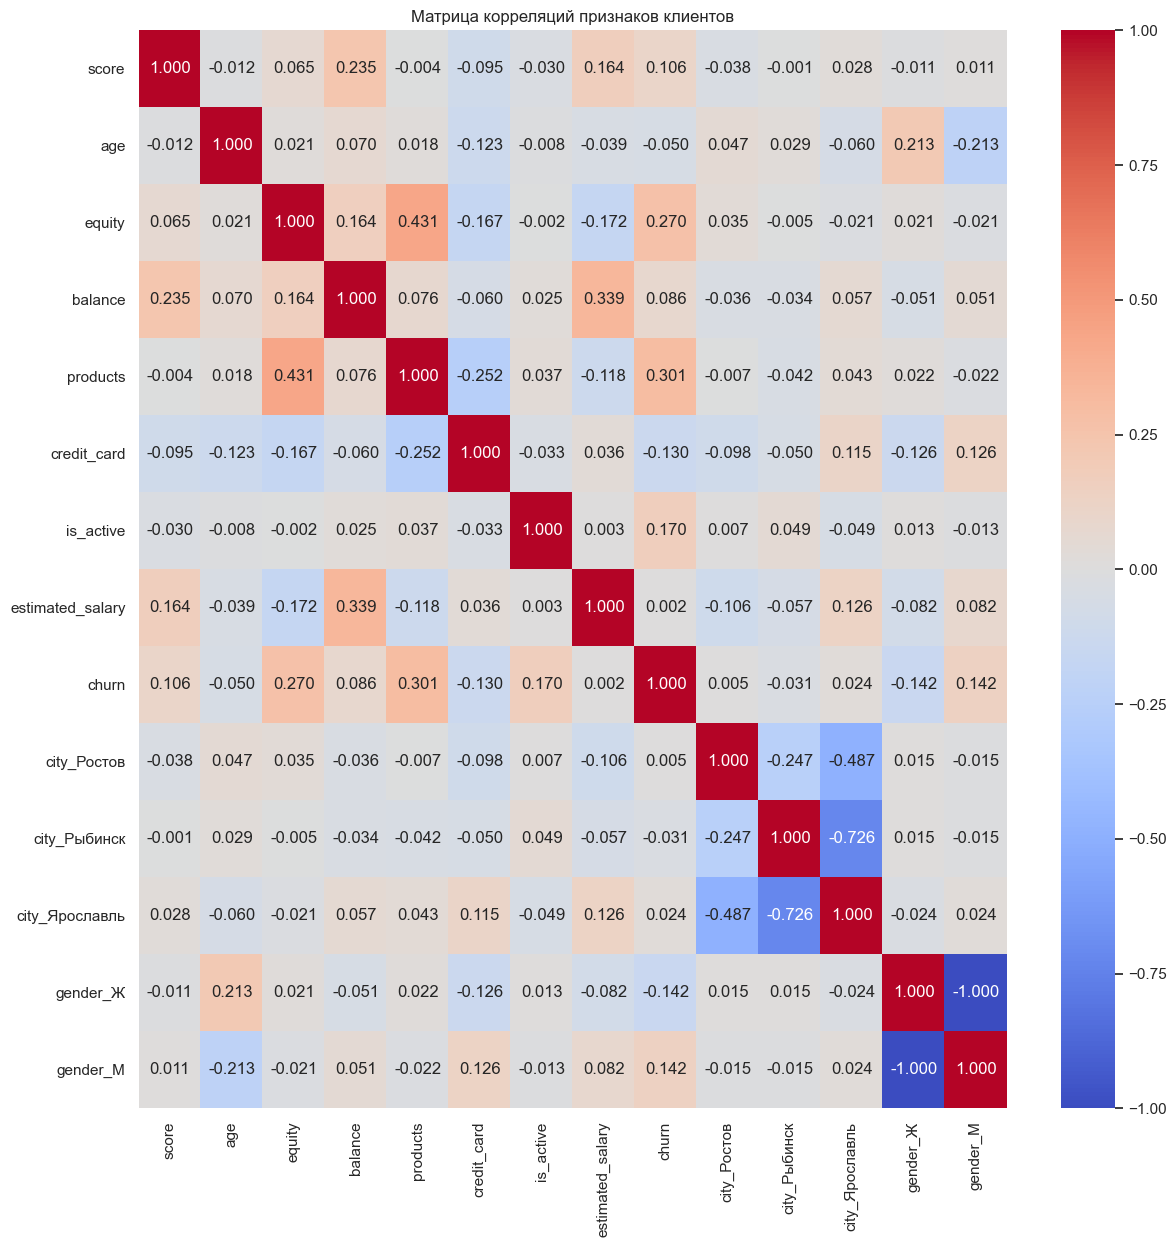

In [19]:
plt.figure(figsize=(14,14))
sns.heatmap(dt_coded.drop(['id', 'is_balance_nan'], axis=1).corr(), cmap='coolwarm', center=0, annot=True, fmt='.3f')
plt.title('Матрица корреляций признаков клиентов')
plt.show()

Для оценки силы связи в теории корреляции применяется шкала английского статистика Чеддока: слабая — от 0,1 до 0,3; умеренная — от 0,3 до 0,5; заметная — от 0,5 до 0,7; высокая — от 0,7 до 0,9; весьма высокая (сильная) — от 0,9 до 1,0. Значения в диапазоне от 0 до 0.1 говорят о том, что взаимосвязь практически отсутствует, так что будем брать во внимание только значения выше этого уровня.

Наблюдения, полученные из матрицы корреляции:
1. Умеренная корреляция: 
*Между баллами собственности и количеством продуктов, балансом на счете и оценочным доходом, отскоком и количеством продуктов есть умеренная положительная корреляция.*


2. Слабая корреляция:
* *Между баллами кредитного скорринга и балансом на счете, оценочным доходом, оттоком есть слабая положительная корреляция.*
* *Между возрастом и полом есть слабая положительная корреляция, так как женщины в имеющихся данных в среднем немного старше мужчин, между возрастом и наличием кредитной карты есть слабая отрицательная корреляция.*
* *Между баллами собственности и балансом на счете, оттоком есть слабая положительная корреляция, между баллами собственности и наличием кредитной карты, оценочным доходом есть слабая отрицательная корреляция.*
* *Между количеством продуктов и наличием кредитной карты, оценочным доходом есть слабая отрицательная корреляция.*
* *Между наличием кредитной карты и полом есть слабая корреляция, мужчины чаще имеют кредитную карту, чем женщины, между наличием кредитной карты и городом Ярославлем, слабая положительная корреляция, между наличием кредитной карты и отток слабая отрицательная корреляция.*
* *Между признаком активности и оттоком есть слабая положительная корреляция.*
* *Между оценочным доходом и Ярославлем есть слабая положительная корреляция, между оценочным доходом и Ростовом есть слабая отрицательная корреляция.*
* *Между оттоком и полом есть слабая корреляция, у мужчин отток выше.*

Для составления портретов клиентов создадим таблицу, с признаками клиентов, разбитыми по ушедшим и оставшимся клиентам. Для каждого признака посчитаем относительную разницу.

In [20]:
metrics_by_churn = (
    data.groupby('churn').agg({'score':'mean', 'city':lambda x: pd.Series.mode(x), 
                                      'gender':lambda x: pd.Series.mode(x), 'age':'mean', 
                                      'equity':'mean', 'estimated_salary':['mean', 'median'], 
                                      'products':'mean', 'credit_card':'mean', 
                                      'is_active':'mean', 'balance':['mean', 'median']}).round(2).T.reset_index(drop=True)
)
metrics_by_churn.rename(
    index={0: 'mean_score', 1: 'city_mode', 2: 'gender_mode', 4: 'mean_equity', 5: 'mean_salary', 
           6: 'median_salary', 7: 'mean_products', 8: 'having_credit_card_part', 9: 'last_activity_part', 
           3: 'mean_age', 10: 'mean_balance', 11: 'median_balance'}, inplace=True
)

metrics_by_churn['is_churn_difference'] = round(
    metrics_by_churn.drop(['gender_mode', 'city_mode'],axis = 0)[1].astype(float)
              / metrics_by_churn.drop(['gender_mode', 'city_mode'],axis = 0)[0].astype(float), 2)
metrics_by_churn

churn,0,1,is_churn_difference
mean_score,845.4,863.36,1.02
city_mode,Ярославль,Ярославль,NaN
gender_mode,Ж,М,NaN
mean_age,43.02,41.43,0.96
mean_equity,2.38,3.76,1.58
mean_salary,147674.64,148357.48,1.00
median_salary,118227.6,125408.88,1.06
mean_products,1.76,2.38,1.35
having_credit_card_part,0.71,0.55,0.77
last_activity_part,0.48,0.7,1.46


*Как ни странно, у ушедших клиентов значительно больше баланс на счете, лучше показатель активности, большее число продуктов и баллов собственности, но среди них меньше владельцев кредитных карт. Ушедшие клиенты чаще оказываются мужчинами, а оставшиеся - женщинами. Средние и медианные значения остальных признаков почти не отличаются.*

*Типичный действующий клиент - 43-летняя женщина из Ярославля с 845 баллами кредитного скоринга, 2 баллами собственности, 2 продуктами банка, один из которых - кредитная карта, зарплатой 120000 рублей, с 500000 рублей на балансе, не заходившая в личный кабинет около двух недель.*

*Типичный ушедший клиент - 41-летний мужчина из Ярославля с 863 баллами кредитного скоринга, 4 баллами собственности, 2 продуктами банка, зарплатой 125000 рублей и с 800000 рублей на балансе.*

## Проверка статистических гипотез

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей подходит метод scipy.stats.ttest_ind(). Совокупность всех ушедших клиентов банка не зависит от совокупности всех оставшихся. В сумме у нас почти 10000 значений, а значит, согласно центральной предельной теореме, выборки достаточно велики, чтобы считать, что выборочные средние нормально распределены. Как выяснилось ранее, доля ушедших клиентов в имеющихся данных составляет около 18%, а значит выборки разного размера, следует указать аргумент equal_var=False.

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Нулевая гипотеза: Между доходом ушедших клиентов и доходом оставшихся нет значимой разницы.

Альтернативная гипотеза: Между доходами ушедших и оставшихся клиентов есть значимая разница.

In [21]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

churned_client_salary = data.query('churn==1')['estimated_salary']
unchurned_client_salary = data.query('churn==0')['estimated_salary']

# добавил equal_var=False потому что выборки разного размера
results = st.ttest_ind(churned_client_salary, unchurned_client_salary, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


*Полученное значение p-value значительно выше заданного уровня значимости, отличие между группами клиентов не оказалось статистически достоверным, можно сказать, что между доходом ушедших клиентов и доходом оставшихся нет значимой разницы.*

Проверим гипотезу различия возраста между ушедшими и оставшимся клиентами.

Нулевая гипотеза: Между возрастом ушедших клиентов и возрастом оставшихся нет значимой разницы.

Альтернативная гипотеза: Между возрастами ушедших и оставшихся клиентов есть значимая разница.

In [22]:
churned_client_age = data.query('churn==1')['age']
unchurned_client_age = data.query('churn==0')['age']

# добавил equal_var=False потому что выборки разного размера
results = st.ttest_ind(churned_client_age, unchurned_client_age, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 7.536127357312234e-08
Отвергаем нулевую гипотезу


*Полученное значение p-value значительно меньше заданного уровня значимости, отличие между группами клиентов оказалось статистически достоверным, можно сказать, что между возрастом ушедших клиентов и возрастом оставшихся есть значимая разница.*

## Подведение промежуточных итогов

На основе результатов анализа распределения признаков, корреляционного анализа, проверки статистических гипотез и рассчитанных мер центральной тенденции в разрезе оттока выберем признаки, которые лягут в основу сегментации:
* **Баланс от 1300000 рублей** - среди ушедших больше доля клиентов с балансом на счете от 1000000 рублей.
* **От 5 баллов собственности** - доля ушедших среди клиентов с 5 баллами собственности - 30%, чем больше у клиентов баллов собственности - тем выше отток.
* **Возраст от 51 до 60 либо от 26 до 36** - среди ушедших больше доля клиентов в возрасте от 26 до 36 и от 50 до 60, чем среди оставшихся.
* **От 830 до 940 баллов кредитного скоринга** - среди ушедших клиентов значние баллов кредитного скоринга чаще оказывается в диапазоне от 830 до 940, чем у действующих клиентов.
* **Оценочный доход от 100000 рублей** - среди ушедших больше доля клиентов с оценочным доходом от 100000 рублей, чем среди оставшихся.
* **Пол - мужской** - доля ушедших мужчин почти в 2 раза выше, чем доля ушедших женщин.
* **Город - Ярославль** - доля ушедших клиентов в этом городе немного выше средней.
* **От 2 продуктов** - доля ушедших клиентов среди тех, у кого есть 3 продукта банка около 28%, для обладателей 4 продуктов этот показатель выше 60%.

## Сегментация

Объединяя признаки отточности, сформируем сегменты.

**Сегмент обеспеченных клиентов:** Клиенты с балансом от 1300000 рублей, имеющие более 4 баллов собственности. Они финансово благополучные и им важно чтобы имущество хранилось на выгодных условиях и приносило им прибыль.

In [23]:
wealthy_segment = data.query('balance>=1300000 and equity>4')
print(f'Количество клиентов в сегменте: {wealthy_segment["id"].count()}')
print(f'Количество отточных клиентов в сегменте: {wealthy_segment.query("churn==1")["id"].count()}')
print(f'Уровень оттока в сегменте: {wealthy_segment["churn"].mean():.2%}')

Количество клиентов в сегменте: 518
Количество отточных клиентов в сегменте: 240
Уровень оттока в сегменте: 46.33%


**Сегмент финансово надежных клиентов:** Клиенты в возрасте от 51 до 60 лет, с баллами кредитного скоринга от 830 до 940 и зарплатой более 100000 рублей. Люди, как правило, успешвие достигнуть определенных успехов в карьере, имеющие хорошую зарплату и хороший шанс на одобрение кредита, им важно чтобы взаимодействие с банком было простым, быстрым и понятным.

In [24]:
reliable_segment = data.query('50<age<=60 and 830<=score<=940 and 100000<estimated_salary')
print(f'Количество клиентов в сегменте: {reliable_segment["id"].count()}')
print(f'Количество отточных клиентов в сегменте: {reliable_segment.query("churn==1")["id"].count()}')
print(f'Уровень оттока в сегменте: {reliable_segment["churn"].mean():.2%}')

Количество клиентов в сегменте: 503
Количество отточных клиентов в сегменте: 165
Уровень оттока в сегменте: 32.80%


**Сегмент продвинутых клиентов:** Мужчины в возрасте от 26 до 36 лет, из Ярославля, пользующиеся 2 и более продуктами. Эти ребята из крупного города, разбирающиеся в банковских продуктах, ценят функциональность и надежность.

In [25]:
advanced_segment = data.query('gender=="М" and city=="Ярославль" and 26<=age<=36 and products>=2')
print(f'Количество клиентов в сегменте: {advanced_segment["id"].count()}')
print(f'Количество отточных клиентов в сегменте: {advanced_segment.query("churn==1")["id"].count()}')
print(f'Уровень оттока в сегменте: {advanced_segment["churn"].mean():.2%}')

Количество клиентов в сегменте: 744
Количество отточных клиентов в сегменте: 262
Уровень оттока в сегменте: 35.22%


**Наиболее рисковый сегмент:** Эмпирическим путем выявлена группа особо склонных к оттоку клиентов - мужчины с балансом от 450000 рублей и более чем 2 продуктами. Нужно приложить большие усилия чтобы их удержать.

In [26]:
risky_segment = data.query('balance>=450000 and products>2 and gender=="М"')
print(f'Количество клиентов в сегменте: {risky_segment["id"].count()}')
print(f'Количество отточных клиентов в сегменте: {risky_segment.query("churn==1")["id"].count()}')
print(f'Уровень оттока в сегменте: {risky_segment["churn"].mean():.2%}')

Количество клиентов в сегменте: 507
Количество отточных клиентов в сегменте: 296
Уровень оттока в сегменте: 58.38%


## Приоритизация сегментов

Так как отдел маректинга включает только двух работников, у них нет автоматизированных систем, все мероприятия, рассылки и агитации выполняются ручным трудом, важно приоритизировать сегменты, чтобы маркетинг знал, на что обратить внимание в первую очередь в случае, если ресурсов маркетинга не хватит на охват всех выделенных сегментов.

В первую следует обработать сегмент **обеспеченных клиентов**, так как они могут принести банку высокую прибыль, затем заняться сохранением **наиболее рисковых клиентов**, иначе более половины из них вскоре разбежится. После это можно заняться сегментами **финансово надежных** и **продвинутых клиентов**.

## Формирование рекомендаций

Чтобы сохранить клиентов из **Сегмента обеспеченных клиентов**, следует предложить им повышенный процент для вкладов и прочих счетов, который определенным образом увеличивается с увеличением суммы средств на счету. Также клиентов этого сегмента могут заинтересовать услуги страхования, открытие инвестиционного и бизнес-счетов.

Клиентам **Сегмента финансово надежных клиентов** не нужны изменения - они были бы рады продолжать пользоваться услугами Метанпромбанка, но что-то их отталкивает. Хорошим решением будет назначить таким клиентам личного менеджера, который должен будет позвонить им с целью знакомства, выяснить все ли их устраивает, объяснить как пользоваться основными функциями приложения. Можно предложить им кредит на выгодных условиях.

Клиентов **Сегмента продвинутых клиентов** можно удержать широким функционалом приложения, специальными предложениями вроде скидок и кешбека при покупках в популярных заведениях Ярославля, рассказать им про продукты банка, которыми они еще не успели воспользоваться.

Для клиентов **Наиболее рискового сегмента** придется применить индивидуальный подход. Выявить их потребности и проблемы, возникшие при взаимодействии с банком, на их основании предложить более выгодные условия в пределах разумного. Если для применения такого подхода не хватает ресурсов, можно наоборот, предложить таким клиентам самые общие временные бонусы: временное снижение комиссии на снятие средств, временное снижение стоимости обеспечения банковского обслуживания, временный повышенный кешбак.